In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the datasets
df_songs = pd.read_excel("/kaggle/input/top-songs-of-the-world/Song.xlsx")  # Songs dataset
df_spotify = pd.read_csv("/kaggle/input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv")  # Spotify Most Streamed Songs dataset
df_aoty = pd.read_csv("/kaggle/input/aoty-5000-highest-user-rated-albums/aoty.csv")  # AOTY dataset

In [219]:
# Display only the first 5 rows of Top Songs of the world Dataset
print(df_songs.head())  

                    Artist                              Title  Year   Sales  \
0  Bill Haley & his Comets              Rock Around the Clock  1955  36.503   
1              Celine Dion                My Heart Will Go On  1998  35.405   
2          Sinead O'Connor               Nothing Compares 2 U  1990  35.135   
3              The Beatles                           Hey Jude  1968  34.442   
4              Bryan Adams  (Everything I Do) I Do it For You  1991  34.367   

   Streams  Downloads  Radio Plays  Rating  
0   19.961      7.458        5.663   0.760  
1   12.636      8.944       23.701   3.610  
2   14.582     10.242       23.747   2.733  
3   25.545     16.390       16.541   1.510  
4   16.523     12.368       23.194   3.121  


In [220]:
# Display the first 5 rows of Spotify Most Streamed Songs Dataset
print(df_spotify.head()) 

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                147  141381703                  4

In [221]:
# Display the first 5 rows of highest User Rated Albums Dataset
print(df_aoty.head())

   id                     title          artist        release_date  \
0   1       To Pimp a Butterfly  Kendrick Lamar      March 15, 2015   
1   2    good kid, m.A.A.d city  Kendrick Lamar    October 22, 2012   
2   3               In Rainbows       Radiohead    October 10, 2007   
3   4  Songs in the Key of Life   Stevie Wonder  September 28, 1976   
4   5               OK Computer       Radiohead        May 21, 1997   

                                            genres  user_score  \
0  Conscious Hip Hop, Jazz Rap, West Coast Hip Hop          95   
1            Conscious Hip Hop, West Coast Hip Hop          94   
2                       Art Rock, Alternative Rock          94   
3                           Soul, Progressive Soul          94   
4                       Alternative Rock, Art Rock          94   

     rating_count                                         album_link  
0  28,594 ratings  https://www.albumoftheyear.org/album/29250-ken...  
1  22,283 ratings  https://www.alb

# Cleaning Datasets

### Songs Dataset

In [182]:
# Step 1: Remove duplicate rows
df_songs = df_songs.drop_duplicates()

# Step 2: Fill missing values
# Fill missing numeric values with the mean
numeric_cols_songs = df_songs.select_dtypes(include=['float64', 'int64']).columns
df_songs[numeric_cols_songs] = df_songs[numeric_cols_songs].fillna(df_songs[numeric_cols_songs].mean())

# Fill missing non-numeric values with "Unknown"
df_songs = df_songs.fillna("Unknown")

# Step 2: Fix Columns to prepare for merge
df_songs.rename(columns={'Artist': 'artist(s)_name', 'Title': 'track_name'}, inplace=True)
print(df_songs.tail(5))

     artist(s)_name                    track_name  Year  Sales  Streams  \
4845        Rihanna  If It's Lovin' That You Want  2005  4.150    1.573   
4846      Al Jolson                     All Alone  1925  4.150    3.211   
4847         Sailor           Girls, Girls, Girls  1976  4.149    0.200   
4848   Inner Circle             Games People Play  1994  4.149    0.512   
4849        The Who               See Me, Feel Me  1970  4.149    3.630   

      Downloads  Radio Plays  Rating  
4845      1.107        2.196   0.510  
4846      0.000        0.000   0.548  
4847      1.220        6.344   0.000  
4848      0.515        3.097   1.700  
4849      1.286        3.000   0.000  


### Spotify DataSet

In [183]:
# Step 1: Remove duplicate rows
df_spotify = df_spotify.drop_duplicates()

# Step 2: Fix Columns to prepare for merge
# Convert to streams column to numeric value
df_spotify = df_spotify[pd.to_numeric(df_spotify["streams"], errors='coerce').notnull()]
df_spotify["streams"] = pd.to_numeric(df_spotify["streams"])

# Format a date column
df_spotify['release_date'] = pd.to_datetime(
    dict(year=df_spotify['released_year'], month=df_spotify['released_month'], day=df_spotify['released_day']),
    errors='coerce'
).dt.strftime('%B %d, %Y')
# Drop uneccesary columns
columns_to_drop = [
    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 
    'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 
    'cover_url', 'in_apple_playlists', 'in_apple_charts', 'released_year', 
    'released_month','released_day'
]

df_spotify.drop(columns=columns_to_drop, inplace=True)
print(df_spotify.columns)

# Step 3: Fill missing values
# Fill missing numeric values with the mean
numeric_cols_spotify = df_spotify.select_dtypes(include=['float64', 'int64']).columns
df_spotify[numeric_cols_spotify] = df_spotify[numeric_cols_spotify].fillna(df_spotify[numeric_cols_spotify].mean())

# Fill missing non-numeric values with "Unknown"
df_spotify = df_spotify.fillna("Unknown")

print(df_spotify.head(5))

Index(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'release_date'],
      dtype='object')
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   in_spotify_playlists  in_spotify_charts    streams     release_date  
0                   553                147  141381703    July 14, 2023  
1                  1474                 48  133716286   March 23, 2023  
2                  1397                113  140003974    June 30, 2023  
3                  7858                100  800840817  August 23, 2019  
4                  3133          

### Highest User Rated Albums Dataset

In [184]:
# Step 1: Remove duplicate rows
df_aoty = df_aoty.drop_duplicates()

# Step 2: Fix Columns to prepare for merge
df_aoty['user_score'] = pd.to_numeric(df_aoty['user_score'], errors='coerce')
columns_to_drop_aoty = ['album_link']
df_aoty.drop(columns=columns_to_drop_aoty, inplace=True)

# Step 3: Fill missing values
# Fill missing numeric values with the mean
numeric_cols_aoty = df_aoty.select_dtypes(include=['float64', 'int64']).columns
df_aoty[numeric_cols_aoty] = df_aoty[numeric_cols_aoty].fillna(df_aoty[numeric_cols_aoty].mean())

# Fill missing non-numeric values with "Unknown"
df_aoty = df_aoty.fillna('Unknown')

# Display the first 5 rows
print(df_aoty.head())

# Align column names for merging
df_aoty.rename(columns={'title': 'track_name', 'artist': 'artist(s)_name'}, inplace=True)


   id                     title          artist        release_date  \
0   1       To Pimp a Butterfly  Kendrick Lamar      March 15, 2015   
1   2    good kid, m.A.A.d city  Kendrick Lamar    October 22, 2012   
2   3               In Rainbows       Radiohead    October 10, 2007   
3   4  Songs in the Key of Life   Stevie Wonder  September 28, 1976   
4   5               OK Computer       Radiohead        May 21, 1997   

                                            genres  user_score    rating_count  
0  Conscious Hip Hop, Jazz Rap, West Coast Hip Hop          95  28,594 ratings  
1            Conscious Hip Hop, West Coast Hip Hop          94  22,283 ratings  
2                       Art Rock, Alternative Rock          94  19,366 ratings  
3                           Soul, Progressive Soul          94   5,952 ratings  
4                       Alternative Rock, Art Rock          94  21,163 ratings  


# Data Filtering

### Filter out Low Performing Songs

In [185]:
# Songs Dataset - Filter for songs with downloads greater than the median
high_download_songs = df_songs[df_songs['Downloads'] > df_songs[ 'Downloads' ].median ()]

# Spotify Dataset - Filter for songs with streams greater than the mean
high_streams_spotify = df_spotify[df_spotify['streams']>df_spotify['streams'].mean()]

# Albums of the year Dataset - Filter for songs with User Scores greater than the mean
high_scores_aoty = df_aoty[df_aoty['user_score']>df_aoty['user_score'].mean()]

### Filter for Relevant Songs (2022 and above)

In [ ]:
# Filter for songs released in the last 10 years across all datasets, and set them abck equal to original dataframe
df_songs = high_download_songs[high_download_songs[ 'Year'] >= 2012]
df_spotify = high_streams_spotify[high_streams_spotify['release_date'] >= '2012-01-01']
df_aoty= high_scores_aoty[high_scores_aoty['release_date'] >= '2012-01-01']
print(df_songs)

               artist(s)_name                         track_name  Year  \
0     Bill Haley & his Comets              Rock Around the Clock  1955   
1                 Celine Dion                My Heart Will Go On  1998   
2             Sinead O'Connor               Nothing Compares 2 U  1990   
3                 The Beatles                           Hey Jude  1968   
4                 Bryan Adams  (Everything I Do) I Do it For You  1991   
...                       ...                                ...   ...   
4845                  Rihanna       If It's Lovin' That You Want  2005   
4846                Al Jolson                          All Alone  1925   
4847                   Sailor                Girls, Girls, Girls  1976   
4848             Inner Circle                  Games People Play  1994   
4849                  The Who                    See Me, Feel Me  1970   

       Sales  Streams  Downloads  Radio Plays  Rating  
0     36.503   19.961      7.458        5.663   0.760  

In [187]:
print(df_spotify)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     in_spotify_playlists  in_spotify_charts    streams       r

In [188]:
print(df_aoty)

        id                track_name       artist(s)_name        release_date  \
0        1       To Pimp a Butterfly       Kendrick Lamar      March 15, 2015   
1        2    good kid, m.A.A.d city       Kendrick Lamar    October 22, 2012   
2        3               In Rainbows            Radiohead    October 10, 2007   
3        4  Songs in the Key of Life        Stevie Wonder  September 28, 1976   
4        5               OK Computer            Radiohead        May 21, 1997   
...    ...                       ...                  ...                 ...   
4995  4996             Comfort to Me  Amyl & The Sniffers  September 10, 2021   
4996  4997           mini mix vol. 2        Magdalena Bay   November 20, 2020   
4997  4998       One of the Best Yet           Gang Starr    November 1, 2019   
4998  4999             Dance of Love     Tucker Zimmerman    October 11, 2024   
4999  5000               Youthanasia             Megadeth    November 1, 1994   

                           

# Merging and Orginizing Data

### Retrieve common words across popular tracks
Merges Spotify tracks and Top Rated Songs Track

In [189]:
# Merge Spotify Dataset and Top Rated Songs dataset by song name
song_titles = pd.concat([df_songs['track_name'], df_spotify['track_name']]).dropna()
#split each title
common_words = pd.Series(' '.join(song_titles).split()).value_counts().head(10)
print(common_words)

You     480
the     430
I       365
Love    336
The     309
Me      299
of      254
My      245
a       219
to      199
Name: count, dtype: int64


### Merged all Datasets

In [ ]:
merged_all = pd.merge(
    pd.merge(
        df_songs, 
        df_spotify, 
        on=['track_name', 'artist(s)_name'], 
        how='inner'
    ),
    df_aoty, 
    on=['track_name', 'artist(s)_name'], 
    how='inner'
)

# Sort by 'streams' (Spotify), 'Rating' (Songs), and 'user_score' (AOTY)
sorted_merged_all = merged_all.sort_values(by=['streams', 'Rating', 'user_score'], ascending=False)

# Drop duplicates based on 'track_name'
sorted_merged_all = sorted_merged_all.drop_duplicates(subset=['track_name'])
print(sorted_merged_all[['track_name', 'artist(s)_name', 'Rating', 'streams', 'user_score']].head())

                  Title       artist(s)_name  Rating       streams  user_score
0            Without Me       Eminem   2.233  1.687664e+09          84
35        The Scientist     Coldplay   0.000  1.608164e+09          81
4          Viva La Vida     Coldplay   0.000  1.592910e+09          81
8   The Real Slim Shady       Eminem   0.510  1.424590e+09          84
11                 Numb  Linkin Park   0.524  1.361425e+09          83


# Analysis

### Pivot Table

In [223]:
# Get the current year
current_year = pd.to_datetime('today').year

# Filter for the last 10 years
recent_years = list(range(current_year - 10, current_year + 1))
sorted_merged_all = df_spotify[df_spotify['released_year'].isin(recent_years)]

# Ensure the streams column is numeric
sorted_merged_all['streams'] = pd.to_numeric(sorted_merged_all['streams'], errors='coerce')
sorted_merged_all['streams'].fillna(0, inplace=True)

# Create the pivot table: Sum of streams per artist per year
pivot_table = sorted_merged_all.pivot_table(
    values='streams',
    index='artist(s)_name',
    columns='released_year',
    aggfunc='sum',
    fill_value=0
)

# Add a total streams column and sort by it
pivot_table['Total Streams'] = pivot_table.sum(axis=1)
top_artists = pivot_table.sort_values(by='Total Streams', ascending=False).head(10)

print(top_artists)

released_year         2014        2015        2016        2017        2018  \
artist(s)_name                                                               
The Weeknd               0  1947371785  2332666215           0  1449799467   
Ed Sheeran      4517234024           0           0  6122072964           0   
Taylor Swift    3255979784           0           0   685032533           0   
Harry Styles             0           0           0           0           0   
Bad Bunny                0           0           0           0           0   
Olivia Rodrigo           0           0           0           0           0   
Lewis Capaldi            0           0           0           0  2887241814   
Doja Cat                 0           0           0           0           0   
SZA                      0           0           0           0           0   
BTS                      0           0           0           0           0   

released_year         2019        2020        2021        2022 

/tmp/ipykernel_24/362135777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_merged_all['streams'] = pd.to_numeric(sorted_merged_all['streams'], errors='coerce')
/tmp/ipykernel_24/362135777.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sorted_merged_all['streams'].fillna

### Total Streams by Genre

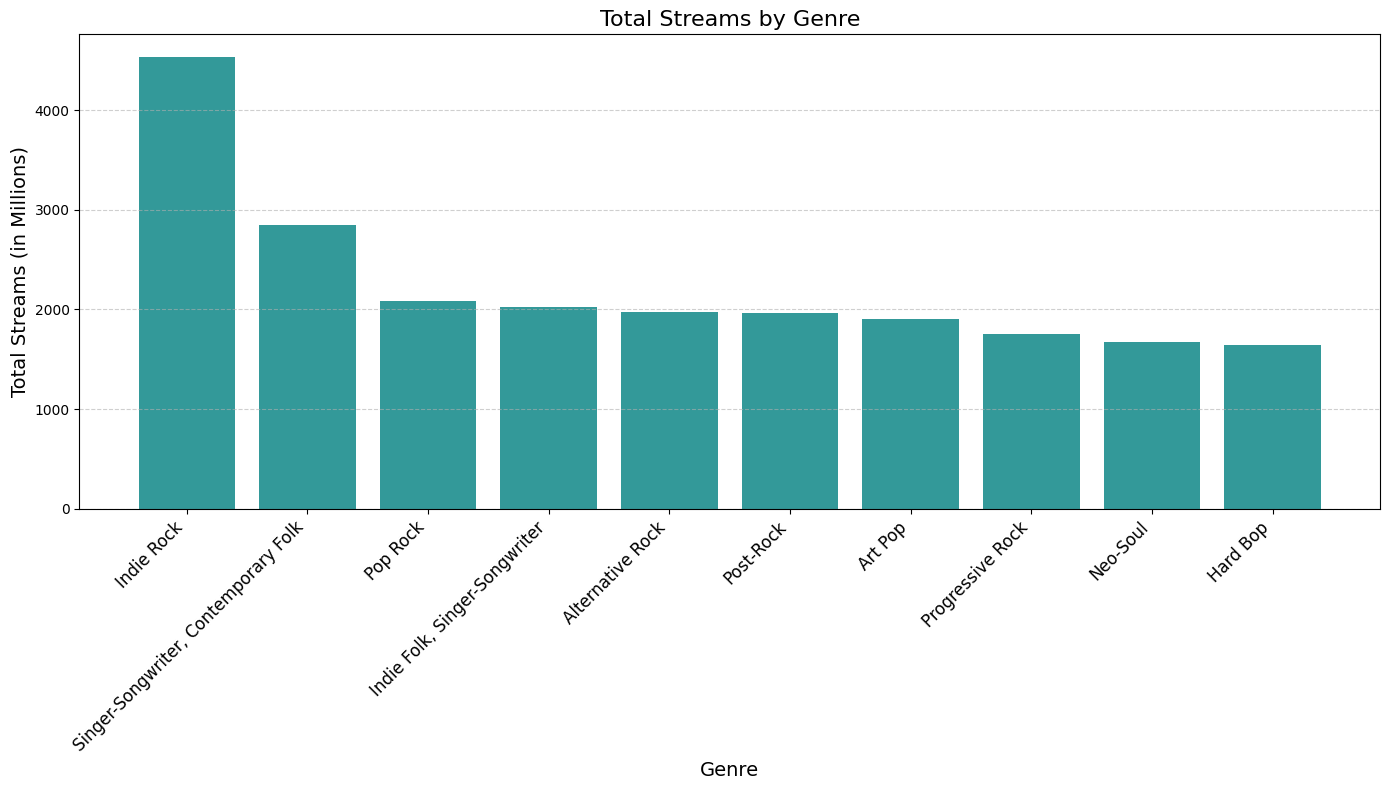

In [ ]:
genre_streams = sorted_merged_all.groupby('genres')['user_score'].sum().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(14, 8))
plt.bar(genre_streams.index, genre_streams.values, color='teal', alpha=0.8)
plt.title('Total Streams by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Streams (in Millions)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Distribution of metrics

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

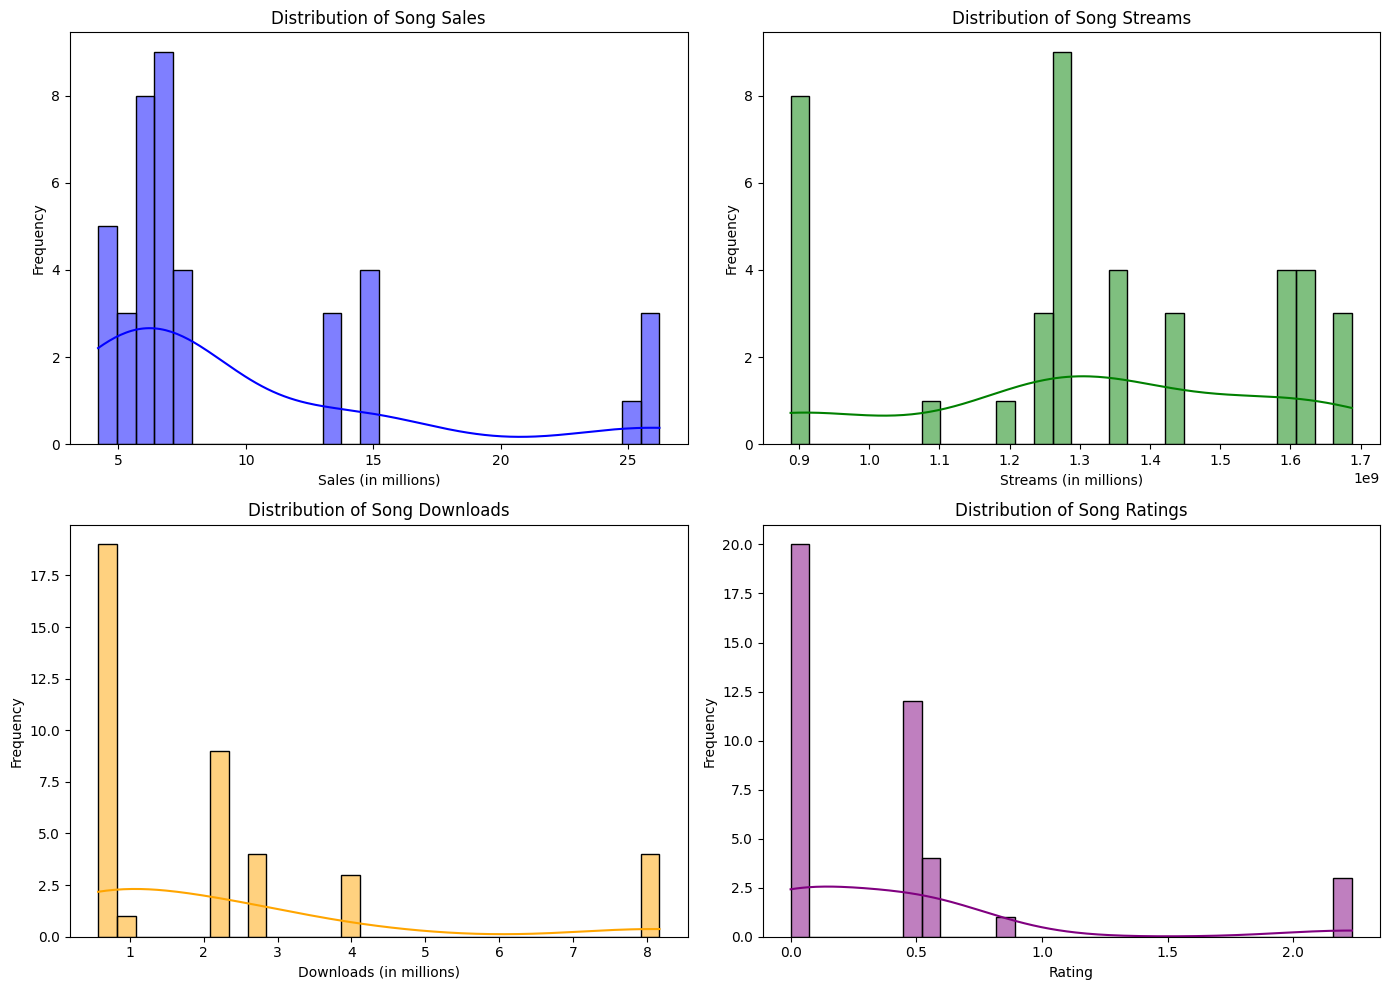

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Sales
sns.histplot(sorted_merged_all['Sales'], kde=True, color='blue', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Song Sales')
axes[0, 0].set_xlabel('Sales (in millions)')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Streams
sns.histplot(sorted_merged_all['streams'], kde=True, color='green', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Song Streams')
axes[0, 1].set_xlabel('Streams (in millions)')
axes[0, 1].set_ylabel('Frequency')

# Distribution of Downloads
sns.histplot(sorted_merged_all['Downloads'], kde=True, color='orange', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Song Downloads')
axes[1, 0].set_xlabel('Downloads (in millions)')
axes[1, 0].set_ylabel('Frequency')

# Distribution of Ratings
sns.histplot(sorted_merged_all['Rating'], kde=True, color='purple', bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Song Ratings')
axes[1, 1].set_xlabel('Rating')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Replace above with proper DF name

### Top 10 artists and Sales

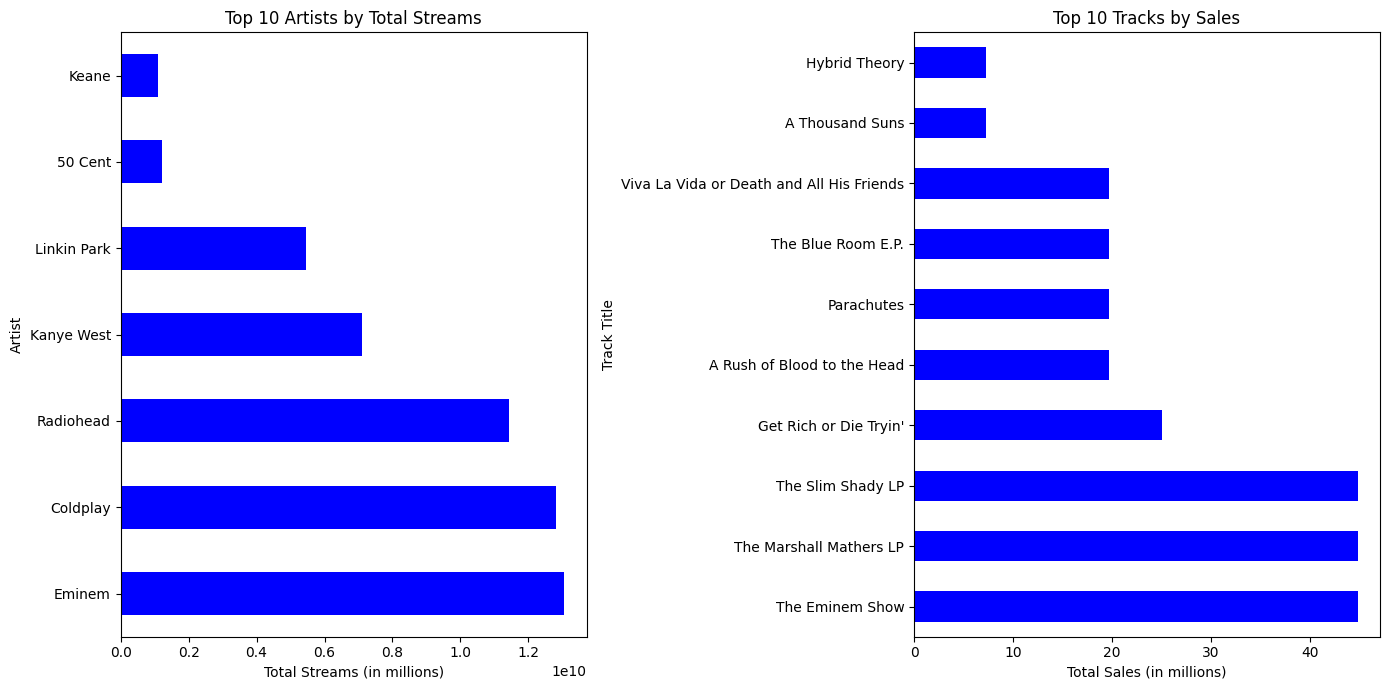

In [ ]:

# Group by Artist to find the top artists by total streams
top_artists_by_streams = sorted_merged_all.groupby('artist')['streams'].sum().nlargest(10)

# Group by Track to find the top tracks by total sales
top_tracks_by_sales = sorted_merged_all.groupby('title')['Sales'].sum().nlargest(10)

# Plot the side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot Top 10 Artists by Streams
top_artists_by_streams.plot(kind='barh', color='blue', ax=axes[0])
axes[0].set_title('Top 10 Artists by Total Streams')
axes[0].set_xlabel('Total Streams (in millions)')
axes[0].set_ylabel('Artist')

# Plot Top 10 Tracks by Sales
top_tracks_by_sales.plot(kind='barh', color='blue', ax=axes[1])
axes[1].set_title('Top 10 Tracks by Sales')
axes[1].set_xlabel('Total Sales (in millions)')
axes[1].set_ylabel('Track Title')

# Adjust layout
plt.tight_layout()
plt.show()

### Song Popularity over time



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

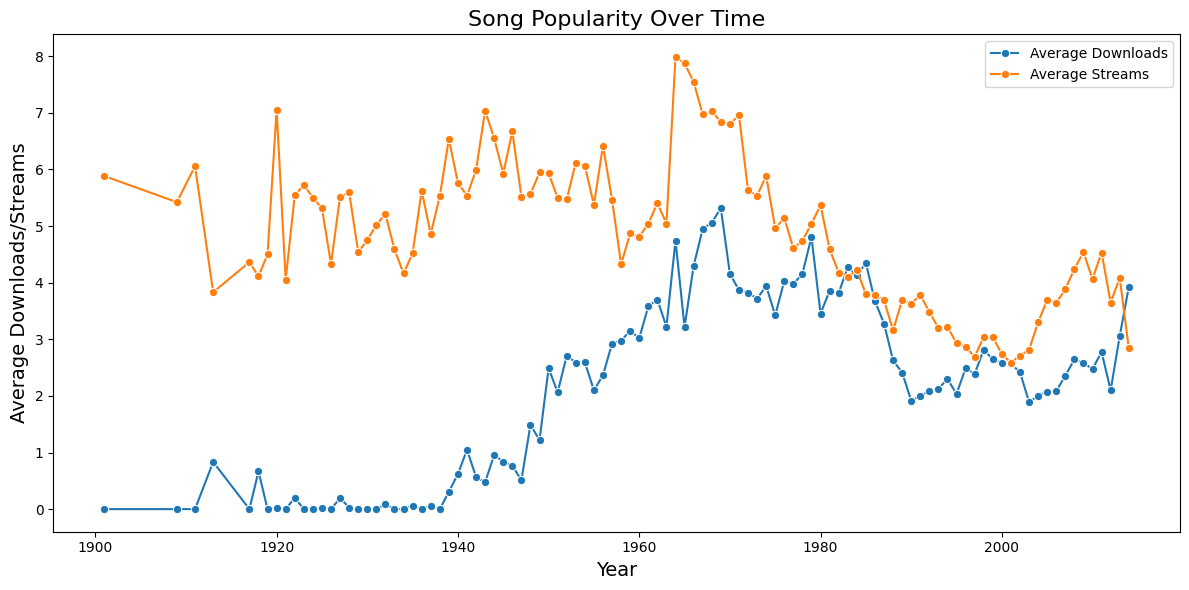

In [ ]:
# Calculate the average downloads and streams by year
popularity_over_time = sorted_merged_all.groupby('Year')[['Downloads', 'Streams']].mean().reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot average downloads over time
sns.lineplot(data=popularity_over_time, x='Year', y='Downloads', label='Average Downloads', marker="o")

# Plot average streams over time
sns.lineplot(data=popularity_over_time, x='Year', y='Streams', label='Average Streams', marker="o")

# Add title and labels
plt.title('Song Popularity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Downloads/Streams', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### Impact of Playlists on Streams

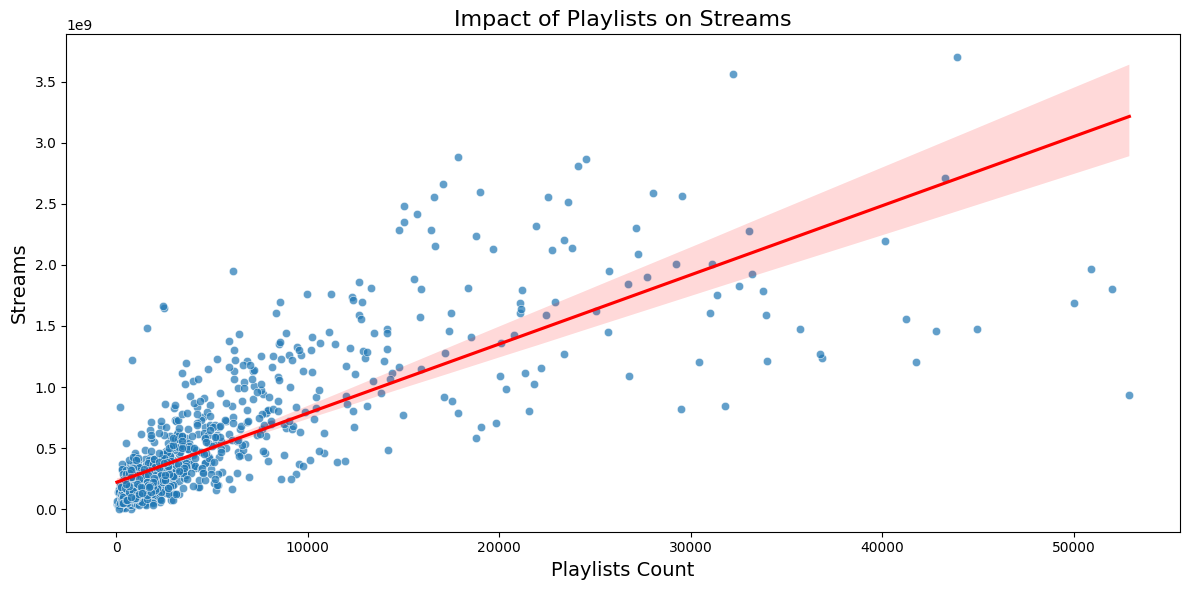

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a scatter plot to show the relationship between playlists and streams
sns.scatterplot(data=df_spotify, x='in_spotify_playlists', y='streams', alpha=0.7)

# Add a regression line to show the trend
sns.regplot(data=df_spotify, x='in_spotify_playlists', y='streams', scatter=False, color="red")

# Add a title and labels for the axes
plt.title('Impact of Playlists on Streams', fontsize=16)
plt.xlabel('Playlists Count', fontsize=14)
plt.ylabel('Streams', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Comparison of Top Artists Across Datasets

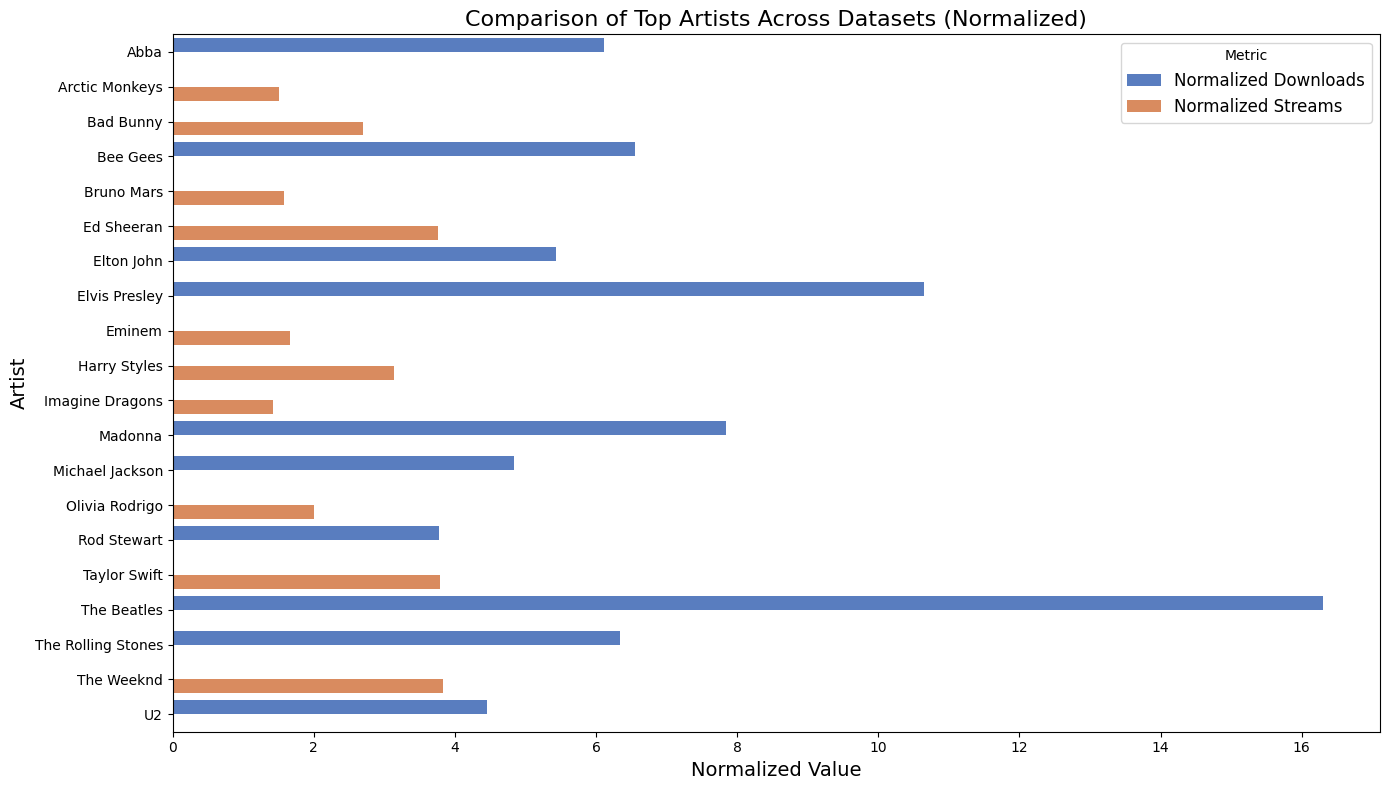

In [ ]:
# Normalize Downloads and Streams
df_songs['Downloads (Normalized)'] = df_songs['Downloads'] / df_songs['Downloads'].max()
df_spotify['Streams (Normalized)'] = df_spotify['streams'] / df_spotify['streams'].max()

# Create normalized dataframes for comparison
top_artists_songs_normalized = df_songs.groupby('Artist')['Downloads (Normalized)'].sum().nlargest(10).reset_index()
top_artists_spotify_normalized = df_spotify.groupby('artist(s)_name')['Streams (Normalized)'].sum().nlargest(10).reset_index()

# Merge normalized datasets
comparison_normalized_df = pd.merge(
    top_artists_songs_normalized.rename(columns={'Artist': 'Artist', 'Downloads (Normalized)': 'Normalized Downloads'}),
    top_artists_spotify_normalized.rename(columns={'artist(s)_name': 'Artist', 'Streams (Normalized)': 'Normalized Streams'}),
    on='Artist',
    how='outer'
).fillna(0)

# Bar chart visualization
comparison_normalized_df = comparison_normalized_df.melt(id_vars='Artist', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_normalized_df, x='Value', y='Artist', hue='Metric', palette="muted")
plt.title('Comparison of Top Artists Across Datasets (Normalized)', fontsize=16)
plt.xlabel('Normalized Value', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.tight_layout()
plt.show()